## Lab 1: Linear regression, OLS and gradient descent 

[[1.         0.        ]
 [1.         0.55555556]
 [1.         1.11111111]
 [1.         1.66666667]
 [1.         2.22222222]
 [1.         2.77777778]
 [1.         3.33333333]
 [1.         3.88888889]
 [1.         4.44444444]
 [1.         5.        ]]
[1.         1.55555556 2.11111111 2.66666667 3.22222222 3.77777778
 4.33333333 4.88888889 5.44444444 6.        ]


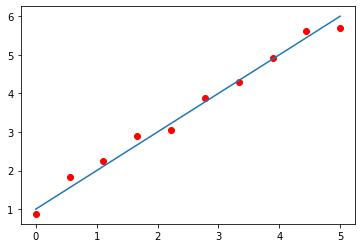

In [1]:

import numpy as np
import matplotlib.pyplot as plt


# 1) Generating synthetic data
# =================================
# We start by generating equispaced points on the interval [0,5]. In this case we 
# assume a simple parametric model between the targets and the features 
# of the form t = h_beta(x) and we suppose 
# that our targets are generated as t_i = h_beta(x_i) = beta0 + beta1*x_i for 
# some beta0, beta1 (which we fix to arbitrary unknown constants)

x = np.linspace(0, 5, num=10)

xtilde = np.hstack((np.ones((len(x),1)).reshape(-1,1), x.reshape(-1,1)))


print(xtilde)

beta0 =1
beta1 = 1


beta = np.array([beta0, beta1])

targets = np.dot(beta, xtilde.T)

print(targets) # ti's 

# In most situation our assumption on the model h_beta will not be able to 
# match perfectly the data set. To put ourselves in such a framework, we perturb 
# our samples with some random noise epsilon_i so that they do not perfectly lie on 
# a line anymore. 

t_noisy = targets + np.random.normal(0, 0.2, len(x))

plt.scatter(x, t_noisy, c='r')
plt.plot(x, targets)
plt.show()



In [2]:
# 2) Learning the model
# =================================

# The supervised learning problem then consist in find an appropriate mapping h_beta 
# that predicts as well as possible the targets t_i from the features x_i's
# Since we assumed the simple parametric model h_beta(x) = beta0 + beta1*x, we are left with 
# finding the beta0 and beta1 such that the t_i are best predicted from the x_i

# there are several criteria we could use. Here we choose to use a least squares loss (OLS for ordinary least squares)
# of the form L(beta) = sum_i (t_i - (beta0 + beta1*x_i))^2 which penalize the squares of the 
# differences between the predictions from our model and the actual targets


# We have our criterion, now we need a way to find the associated optimal 
# beta0 and beta1, that is to say the values beta0 and beta1 that make this loss minimum
# for this again there are multiple options. The first one is to follow the 
# opposite direction to the gradient until we reach a minimum. Indeed, the gradient 
# of a function always points in the direction of steepest ascent. By taking - grad, we 
# are thus guaranteed to decrease the value of the function. The gradient is the vector concatenating 
# the derivatives with respect to each variable (beta0 and beta1), we thus have grad = [dL/dbeta0, dL/dbeta1]

# Once we have computed the derivatives of L with respect to beta0 and beta1, 
# we can then apply the updates

# beta0 <-- beta0 - eta * dL/dbeta0
# beta1 <-- beta1 - eta * dL/dbeta1

# for a sufficiently small eta also known as the learning rate. If eta is small enough, since -gradient 
# always points in the direction of steepest descent will end up reaching a point of zero derivative


In [3]:

# setting the learning rate
eta = 0.1

# setting max num of gradient updates
maxIter = 100


# initial, starting point for (beta0, beta1)
beta_init = np.random.normal(0,1,2)
beta = beta_init

reweighting = np.true_divide(1, 2*len(x))



# gradient updates

for iter in np.arange(0,maxIter):

    
    grad_beta0 = 2*reweighting*np.sum((targets.reshape(-1,1) - np.dot(beta, xtilde.T).reshape(-1,1)))*(-1)
    grad_beta1_tmp = (targets.reshape(-1,1) - np.dot(beta, xtilde.T).reshape(-1,1))
    grad_beta1 = -2*reweighting*np.sum(np.multiply(grad_beta1_tmp,x.reshape(-1,1)))
    
    beta[0] = beta[0] - eta*grad_beta0
    beta[1] = beta[1] - eta*grad_beta1


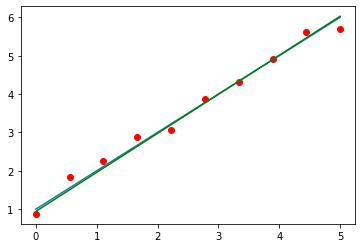

In [4]:
xprediction = np.linspace(0,5,50)
xpredictiontilde = np.hstack((np.ones((len(xprediction),1)).reshape(-1,1), xprediction.reshape(-1,1)))

targets_prediction = np.dot(beta, xpredictiontilde.T)


# plot of the recovered model on top of the true (unknown one)
plt.scatter(x, t_noisy, c='r')
plt.plot(x, targets)
plt.plot(xprediction, targets_prediction, c='g')
plt.show()


In [33]:
grad_beta0

-43.21923641728319